**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here
import numpy as np
import pandas as pd
from copy import copy
from types import SimpleNamespace
import sympy as sm
from scipy import optimize
import matplotlib.pyplot as plt


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor



The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
bl = SimpleNamespace()

bl.alpha = 0.5
bl.kappa = 1.0
bl.nu = 1/(2*16**2)
bl.w = 1
bl.tau = 0.3
bl.w_tilde = (1-bl.tau)*bl.w

In [3]:
import numpy as np
import scipy.optimize as optimize

# Given list of G values
G_list = [1.0, 2.0]

# Calculate bl.w_tilde
bl.w_tilde = (1 - bl.tau) * bl.w

# Define value function
def V(L, G, bl):
    """
    Calculates the value function.

    Args:
        L (float): Labor input.
        G (float): G value.
        bl: An object with parameters.

    Returns:
        float: Value function output.
    """
    return np.log(((bl.kappa + (1 - bl.tau) * bl.w * L) ** bl.alpha) * G ** (1 - bl.alpha)) - bl.nu * ((L * L) / 2)

def L_opt_analytical(bl, G):
    """
    Calculates the analytical solution for optimal labor input.

    Args:
        bl: An object with parameters.
        G (list): List of G values.

    Returns:
        list: List of optimal labor inputs.
    """
    L_opt = []
    for k in G:
        L_opt.append((-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde))
    return L_opt

def L_opt(G, bl):
    """
    Calculates the numerical solution for optimal labor input.

    Args:
        G (list): List of G values.
        bl: An object with parameters.

    Returns:
        list: List of optimal labor inputs.
    """
    sol = []
    for k in G:
        obj = lambda L: -V(L, k, bl)
        x0 = 12
        sol.append(optimize.minimize(obj, x0, method='Nelder-Mead', bounds=((0, 24),)).x[0])
    return sol

# Calculate numerical solutions for optimal labor input
solutions = L_opt(G_list, bl)
solution = list(solutions)

# Calculate analytical solutions for optimal labor input
solution_analytical = L_opt_analytical(bl, G_list)

# Print the results
print(f"The estimated solutions for G=1 and G=2, respectively, are {solution}")
print(f"The analytical solutions for G=1 and G=2, respectively, are {solution_analytical}")


The estimated solutions for G=1 and G=2, respectively, are [15.301684570312506, 15.301684570312506]
The analytical solutions for G=1 and G=2, respectively, are [15.30165022719559, 15.30165022719559]


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

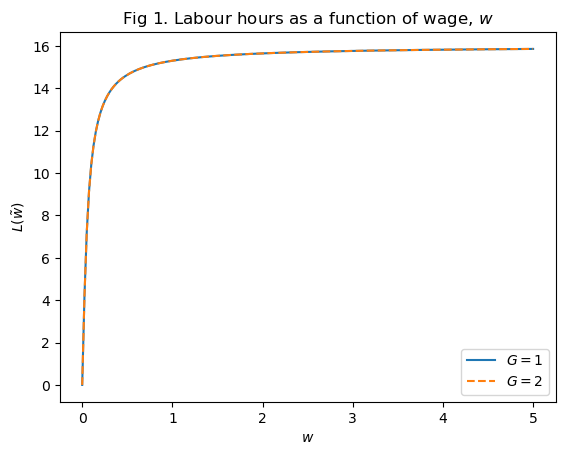

In [4]:


# Create grids
ws = np.linspace(0,5,200)
sols = np.empty((2,200))
sol_1 = np.empty(200)
sol_2 = np.empty(200)

#Unpack solution for each G
for i,w in enumerate(ws):
    bl.w = w
    sols = L_opt(G_list, bl)
    sols_list = list(sols)
    sol_1[i] = sols_list[0]
    sol_2[i] = sols_list[1]

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ws,sol_1, label = '$G=1$')
ax.plot(ws,sol_2,'--', label = '$G=2$')

ax.set_title(r"Fig 1. Labour hours as a function of wage, $w$")
ax.set_ylabel(r'$L(\tilde w)$')
ax.set_xlabel('$w$')
ax.legend()






We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/var/folders/w0/_4jn_wpx15zbcj847_kd1rhm0000gn/T/ipykernel_66486/1329729795.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde)


(0.0, 4.0)

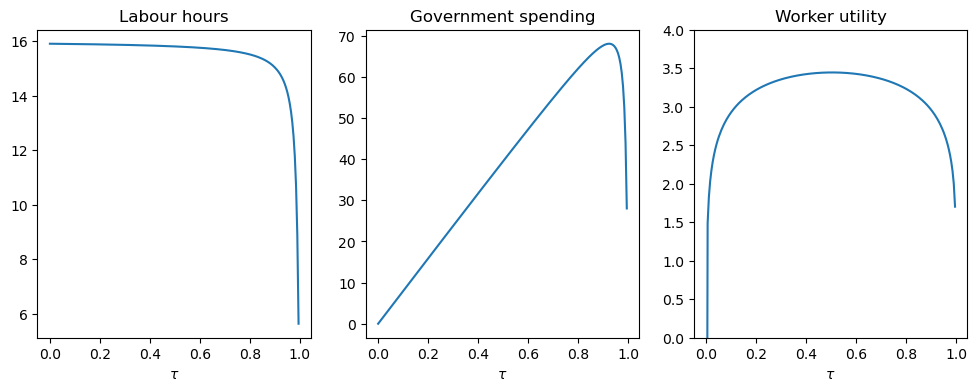

In [6]:
# Define G
def G_func(L, bl): return bl.tau*bl.w*L

# Define analytical solution with definition for G substituted
def L_analytical_func(bl): 
    return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde)

# Define Value function with definition for G substituted
def V_new(L,bl):
    return np.log(((bl.kappa + (1 - bl.tau) * bl.w * L) ** bl.alpha) * (bl.tau*bl.w*L) ** (1 - bl.alpha)) - bl.nu * ((L * L) / 2)


def iterate_over_tau(bl, do_print = False):

    # Create grid of taus and empty arrays
    tau_grid = np.linspace(1e-8,1,200)
    L_vec = np.empty(200)
    G_vec = np.empty(200)
    V_vec = np.empty(200)

    # Iterate L, G and V over tau
    for i, tau in enumerate(tau_grid):
        bl.tau = tau 
        bl.w_tilde = (1-bl.tau)*bl.w

        L_vec[i] = L_analytical_func(bl)
        G_vec[i] = G_func(L_vec[i], bl)
        V_vec[i] = V(L_vec[i], G_vec[i], bl) 

        if do_print == True: 
            print(f'for tau = {tau}, L = {L_vec[i]}, G = {G_vec[i]} and V = {V_vec[i]}')

    return tau_grid, L_vec, G_vec, V_vec 

tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)    


# Plot figures
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,3,1)
ax.plot(tau_grid, L_vec)
ax.set_title('Labour hours')
ax.set_xlabel(r'$\tau$')

ax = fig.add_subplot(1,3,2)
ax.plot(tau_grid, G_vec)
ax.set_title('Government spending')
ax.set_xlabel(r'$\tau$')

ax = fig.add_subplot(1,3,3)
ax.plot(tau_grid, V_vec)
ax.set_title('Worker utility')
ax.set_xlabel(r'$\tau$')
ax.set_ylim(0,4)

    

 


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

/var/folders/w0/_4jn_wpx15zbcj847_kd1rhm0000gn/T/ipykernel_66486/1329729795.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde)


Text(0.5, 1.0, 'Fig 3. Socially optimal tax')

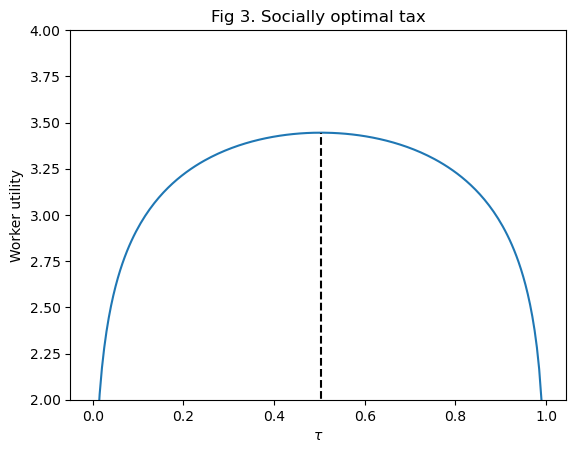

In [7]:
# Identify the maximum V and find the corresponding tau
tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)   
argmax_index = np.argmax((np.nan_to_num(V_vec)))
tau_opt  = tau_grid[argmax_index]

# Illustrate in figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tau_grid, V_vec)
ax.vlines(tau_opt,0,np.max(np.nan_to_num(V_vec)), linestyles='--', colors='black')
ax.set_ylim(2,4)
ax.set_ylabel('Worker utility')
ax.set_xlabel(r'$\tau$')
ax.set_title('Fig 3. Socially optimal tax')



A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

/var/folders/w0/_4jn_wpx15zbcj847_kd1rhm0000gn/T/ipykernel_66486/1329729795.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde)


0.5125628189447237
24.0
15.04375000000003
15.03828125000003
15.034960937500028
15.032714843750028
15.03095703125003
15.02949218750003
15.028222656250028
15.027148437500028
15.02626953125003
15.025390625000028
15.02460937500003
15.023925781250028
15.023339843750028
15.02275390625003
15.02216796875003
15.02167968750003
15.021191406250031
15.02070312500003
15.02031250000003
15.01992187500003
15.019531250000028
15.019140625000029
15.01875000000003
15.01845703125003
15.01806640625003
15.01777343750003
15.017480468750028
15.017187500000029
15.01689453125003
15.016699218750029
15.016406250000028
15.016113281250028
15.015917968750028
15.015625000000028
15.015429687500028
15.015234375000029
15.01494140625003
15.014746093750029
15.014550781250028
15.014355468750027
15.014160156250028
15.013964843750028
15.013769531250029
15.013574218750028
15.013378906250027
15.013281250000027
15.013085937500026
15.012890625000027
15.012695312500028
15.012597656250028
15.012402343750027
15.012304687500027
15.012

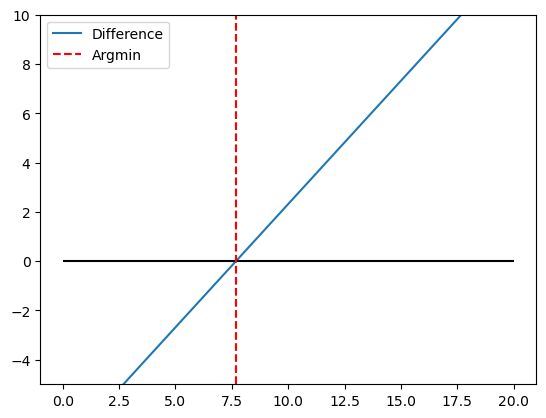

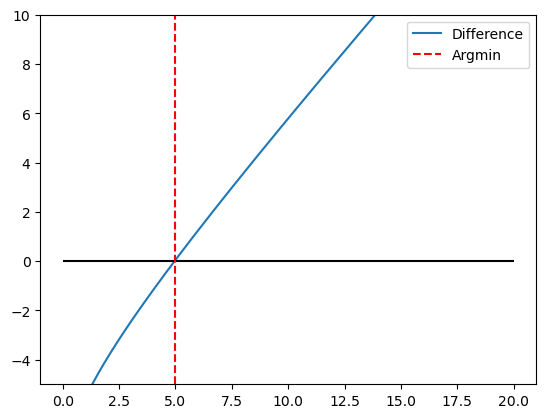

In [12]:
bl.sigma = 1.001
bl.rho = 1.001
bl.w = 1.0

# bl.sigma = [1.001, 1.5]
# bl.rho = [1.001, 1.5]

bl.eps = 1
tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)   
argmax_index = np.argmax((np.nan_to_num(V_vec)))
tau_opt  = tau_grid[argmax_index]

print(tau_opt)

def calculate_C(bl, L, tau=tau_opt):
    return bl.kappa + (1 - tau) * bl.w * L

def calculate_G(bl, L, tau=tau_opt):
    # print(bl.tau,bl.w, L)
    return tau*bl.w*L


def objective_function(L, bl, G):
    C = calculate_C(bl, L)
    # G = calculate_G(bl,L)
    term1 = ((bl.alpha * C**((bl.sigma - 1) / bl.sigma) + (1 - bl.alpha) * G**((bl.sigma -1) / bl.sigma))**(bl.sigma / (bl.sigma-1)))**(1 - bl.rho) - 1
    term2 = bl.nu * L**(1 + bl.eps) / (1 + bl.eps)
    return -(term1 / (1 - bl.rho) - term2)

def solve_for_given_G(bl,G):

    bl.tau = tau_opt
    bl.w = 1.0
    # Define the bounds for L
    L_bounds = (1e-8, 24.0)

    # Set the initial guess for L
    x0 = 1.0

    # Define the optimization problem
    res = optimize.minimize(objective_function, x0, method = 'Nelder-Mead', args=(bl,G), bounds=([L_bounds]))    
    # print(res.x[0])
    G_res = calculate_G(bl, res.x[0])
    
    # Return the optimal value of L
    return res



def find_opt_G(bl,tau=tau_opt, do_print = False):
    Gs = np.linspace(0e-16,20,2000)
    Ls = np.empty(2000)
    diffs = np.empty(2000)
    

    for i, g in enumerate(Gs):
        res = solve_for_given_G(bl,g)
        Ls[i] = res.x
        diffs[i] = g - tau*bl.w*Ls[i]
        
        utility = res.fun

        if do_print is True: print(f'for G = {g} --> L = {Ls[i]} and diff = {diffs[i]}')

    return Gs, Ls, diffs, utility

par_list =[1.001,1.5]

for i in [0,1]:
    bl.rho = par_list[i]
    bl.sigma = par_list[i]
    Gs, Ls, diffs, utility = find_opt_G(bl)
    print(f'for rho, sigma = {bl.rho}')
    print(f'G = {Gs[np.argmin(np.abs(diffs))]} corresponds to L = {Ls[np.argmin(np.abs(diffs))]}'
      ,f' and minimizes the difference G - tau_opt*w*L = {np.min(np.abs(diffs))}')

    fig, ax = plt.subplots(1,1)
    ax.plot(Gs, diffs, label = 'Difference')
    ax.hlines(0, xmin=0, xmax=20, colors='black')
    ax.vlines(Gs[np.argmin(np.abs(diffs))], ymin=-5, ymax=16, linestyles="--", colors='red', label='Argmin')
    ax.set_ylim(-5,10)
    ax.legend()



**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [71]:
bl.sigma = 1.001
bl.rho = 1.001
bl.w = 1.0

# bl.sigma = [1.001, 1.5]
# bl.rho = [1.001, 1.5]
bl.eps = 1
tau_grid, L_vec, G_vec, V_vec = iterate_over_tau(bl)   
argmax_index = np.argmax((np.nan_to_num(V_vec)))
tau_opt  = tau_grid[argmax_index]

def calculate_C(bl, L):
    return bl.kappa + (1 - bl.tau) * bl.w * L

def calculate_G(bl, L):
    # print(bl.tau,bl.w, L)
    return bl.tau*bl.w*L


def objective_function(L, bl, G):
    C = calculate_C(bl, L)
    # G = calculate_G(bl,L)
    term1 = ((bl.alpha * C**((bl.sigma - 1) / bl.sigma) + (1 - bl.alpha) * G**((bl.sigma -1) / bl.sigma))**(bl.sigma / (bl.sigma-1)))**(1 - bl.rho) - 1
    term2 = bl.nu * L**(1 + bl.eps) / (1 + bl.eps)
    return -(term1 / (1 - bl.rho) - term2)

def solve_for_given_G(bl,G,L0):

    # Define the bounds for L
    L_bounds = (1e-8, 24.0)

    # Set the initial guess for L
    x0 = L0

    # Define the optimization problem
    res = optimize.minimize(objective_function, x0, method = 'Nelder-Mead', args=(bl,G), bounds=([L_bounds]))    
    # print(res.x[0])
    G_res = calculate_G(bl, res.x[0])
    
    # Return the optimal value of L
    return res


def find_opt_G(bl, do_print = False):
    N=1000
    Gs = np.linspace(0e-16,20,N)
    Ls = np.empty(N)
    diffs = np.empty(N)
    

    for i, g in enumerate(Gs):
        if i == 0:
            res = solve_for_given_G(bl,g,1)
        else:
            res = solve_for_given_G(bl,g,Ls[i-1]) 

        Ls[i] = res.x
        diffs[i] = g - bl.tau*bl.w*Ls[i]
        utility = res.fun
        
    
        
        if do_print is True: print(f'for G = {g} --> L = {Ls[i]} and diff = {diffs[i]}')

    return Gs, Ls, diffs, utility



def obj(tau):
    bl.tau = tau
    Gs, Ls, diffs, utility = find_opt_G(bl)
    G_cons=Gs[np.argmin(np.abs(diffs))]
    L_cons=Ls[np.argmin(np.abs(diffs))]
    C_cons = calculate_C(bl, L_cons)
    term1 = ((bl.alpha * C_cons**((bl.sigma - 1) / bl.sigma) + (1 - bl.alpha) * G_cons**((bl.sigma -1) / bl.sigma))**(bl.sigma / (bl.sigma-1)))**(1 - bl.rho) - 1
    term2 = bl.nu * L_cons**(1 + bl.eps) / (1 + bl.eps)
    return -(term1 / (1 - bl.rho) - term2)

# fuck = optimize.minimize(obj, x0=0.5, method = 'Nelder-Mead')


/var/folders/w0/_4jn_wpx15zbcj847_kd1rhm0000gn/T/ipykernel_66486/1329729795.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde)


In [72]:
from tqdm import tqdm 

N = 100
taus = np.linspace(0.4,0.6,N)
fuckers = np.empty(N)


for i,tau in tqdm(enumerate(taus)):
    bl.tau = tau
    Gs, Ls, diffs, utility = find_opt_G(bl)
    G_cons=Gs[np.argmin(np.abs(diffs))]
    L_cons=Ls[np.argmin(np.abs(diffs))]
    C_cons = calculate_C(bl, L_cons)
    term1 = ((bl.alpha * C_cons**((bl.sigma - 1) / bl.sigma) + (1 - bl.alpha) * G_cons**((bl.sigma -1) / bl.sigma))**(bl.sigma / (bl.sigma-1)))**(1 - bl.rho) - 1
    term2 = bl.nu * L_cons**(1 + bl.eps) / (1 + bl.eps)
    fuckers[i] = (term1 / (1 - bl.rho) - term2)

# fuck = optimize.minimize(obj, x0=0.5, method = 'Nelder-Mead')


100it [00:29,  3.44it/s]


In [69]:
print(taus)
print(fuckers)

[0.4        0.4020202  0.4040404  0.40606061 0.40808081 0.41010101
 0.41212121 0.41414141 0.41616162 0.41818182 0.42020202 0.42222222
 0.42424242 0.42626263 0.42828283 0.43030303 0.43232323 0.43434343
 0.43636364 0.43838384 0.44040404 0.44242424 0.44444444 0.44646465
 0.44848485 0.45050505 0.45252525 0.45454545 0.45656566 0.45858586
 0.46060606 0.46262626 0.46464646 0.46666667 0.46868687 0.47070707
 0.47272727 0.47474747 0.47676768 0.47878788 0.48080808 0.48282828
 0.48484848 0.48686869 0.48888889 0.49090909 0.49292929 0.49494949
 0.4969697  0.4989899  0.5010101  0.5030303  0.50505051 0.50707071
 0.50909091 0.51111111 0.51313131 0.51515152 0.51717172 0.51919192
 0.52121212 0.52323232 0.52525253 0.52727273 0.52929293 0.53131313
 0.53333333 0.53535354 0.53737374 0.53939394 0.54141414 0.54343434
 0.54545455 0.54747475 0.54949495 0.55151515 0.55353535 0.55555556
 0.55757576 0.55959596 0.56161616 0.56363636 0.56565657 0.56767677
 0.56969697 0.57171717 0.57373737 0.57575758 0.57777778 0.5797

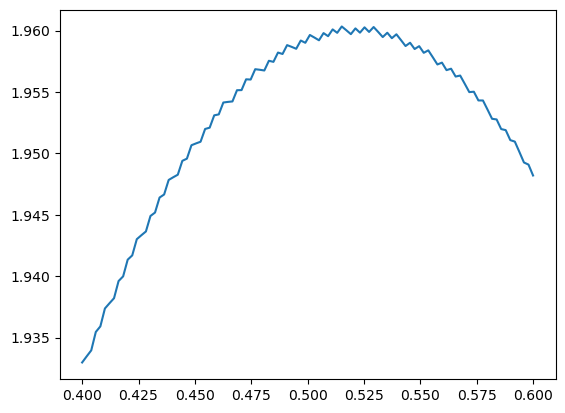

In [73]:
fig, ax = plt.subplots(1,1)
ax.plot(taus, fuckers, label = 'Difference')


In [16]:
# for different values of tau,

# 1. find G such that condition is meet. 

# 2. 


for tau = 1e-08, L = 15.507810588738296, G = 4.96248124062031 and V = 1.968014093580259
for tau = 0.005025135577889447, L = 15.505364410812287, G = 4.96248124062031 and V = 1.965648157696334
for tau = 0.010050261155778895, L = 15.502893802640783, G = 4.96248124062031 and V = 1.9632709962575483
for tau = 0.015075386733668343, L = 15.500398396501216, G = 4.96248124062031 and V = 1.9608825024729915
for tau = 0.02010051231155779, L = 15.497877817255862, G = 4.96248124062031 and V = 1.9584825680243638
for tau = 0.025125637889447237, L = 15.495331682164036, G = 4.96248124062031 and V = 1.9560710830367884
for tau = 0.030150763467336687, L = 15.492759600688554, G = 4.96248124062031 and V = 1.9536479360489285
for tau = 0.03517588904522613, L = 15.490161174296254, G = 4.96248124062031 and V = 1.951213013982379
for tau = 0.04020101462311558, L = 15.487535996252358, G = 4.96248124062031 and V = 1.9487662021103285
for tau = 0.04522614020100503, L = 15.484883651408454, G = 4.96248124062031 and V = 1

/var/folders/w0/_4jn_wpx15zbcj847_kd1rhm0000gn/T/ipykernel_66486/1329729795.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return (-bl.kappa + np.sqrt(bl.kappa * bl.kappa + 4 * (bl.alpha / bl.nu) * bl.w_tilde * bl.w_tilde)) / (2 * bl.w_tilde)


In [43]:
print(bl)

namespace(alpha=0.5, kappa=1.0, nu=0.001953125, w=1.0, tau=1.0, w_tilde=0.0, sigma=1.001, rho=1.001, eps=1)


In [44]:
from scipy import optimize

# Step 1: Define the Objective Function
def objective(L,G,bl):
    term1 = ((bl.alpha * (bl.kappa+((1-bl.tau)*bl.w) **((bl.sigma - 1) / bl.sigma) + (1 - bl.alpha) * G**((bl.sigma -1) / bl.sigma))**(bl.sigma / (bl.sigma-1)))**(1 - bl.rho) - 1)
    term2 = bl.nu * L**(1 + bl.eps) / (1 + bl.eps)
    
    return -(term1 / (1 - bl.rho) - term2)   # Example objective function, modify as needed



# Step 2: Define the Equality Constraint Function
def equality_constraint(L,G):
    return bl.tau*bl.w*L-G  # Example equality constraint, modify as needed

# Step 3: find L and G
bl.tau = tau
Gs, Ls, diffs, utility = find_opt_G(bl)
G=Gs[np.argmin(np.abs(diffs))]
L=Ls[np.argmin(np.abs(diffs))]

# Step 4: Define the Optimization Problem
constraint = {'type': 'eq', 'fun': equality_constraint(L,G)}
problem = optimize.minimize(objective, x0=0, constraints=constraint)

# Step 5: Solve the Problem
solution = problem.x  # Optimal value of x


TypeError: 'numpy.float64' object is not callable